# Assignment1:

Neural Network Implementation on Moon's Dataset
Handwritting Recognition from MNIST Dataset(Numbers given 3&5)


In [1]:
# Calling the Required libraries

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from mnist import MNIST
import matplotlib.cm as cm
from numpy.random import randn
from sklearn import metrics
from sklearn import preprocessing, utils

#For reading MNIST Dataset
import gzip
import sklearn.learning_curve
import matplotlib.pyplot as plt

#For creating Confution Matrix
import seaborn as sb

c:\users\riti chakraborty\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\riti chakraborty\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
#Moons Data - Reading from CSV 
# Using Pandas read CSV to import the dataset
moon = pd.read_csv('moons400.csv')

# With the help of Utils libraries, the data is shuffled which is later on divided in training and testing data.
moon = utils.shuffle(moon)

#Seperating out Attributes and classes
X=moon[['X0', 'X1']].as_matrix()
y=moon[['Class']].as_matrix()

#Dividing the data into training and Testing
Test_Moon = X[0:100,]
Train_Moon = X[101:400,]
label_test = y[0:100,]
label_train = y[101:400,]


In [3]:
#MNIST Dataset


###################The code snippet for reading the gzip files(MNIST Data) has been taken from github.##############################
WORK_DIRECTORY = 'data'
IMAGE_SIZE = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10
def extract_data(filename, num_images):
 
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(28 * 28 * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, 28, 28, 1)
    return data


def extract_labels(filename, num_images):
  """Extract the labels into a vector of int64 label IDs."""
  print('Extracting', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_images)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
  return labels

train_data = extract_data("C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/train-images-idx3-ubyte.gz", 60000)
train_labels = extract_labels("C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/train-labels-idx1-ubyte.gz", 60000)
test_data = extract_data("C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/t10k-images-idx3-ubyte.gz", 10000)
test_labels = extract_labels("C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/t10k-labels-idx1-ubyte.gz", 10000)
#######################The code snippet for reading the gzip files has been taken from github.##############################


#Reshaping the Imported data as per requirement.
X_train11 = pd.DataFrame(np.array(train_data).reshape(60000,784))
y_train11 = pd.DataFrame(np.array(train_labels).reshape(60000,1))

X_test1 = pd.DataFrame(np.array(test_data).reshape(10000,784))
y_test1 = pd.DataFrame(np.array(test_labels).reshape(10000,1))


Extracting C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/train-images-idx3-ubyte.gz
Extracting C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/train-labels-idx1-ubyte.gz
Extracting C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/t10k-images-idx3-ubyte.gz
Extracting C:/Users/Riti Chakraborty/AppData/Local/Programs/Python/Python36-32/Scripts/GZ_IP/t10k-labels-idx1-ubyte.gz


In [4]:
#Data Cleaning: Extracting the data have 3 & 5 as labels
#Training Data
X_train11['label'] = y_train11[0]
type(X_train11)
Tf=X_train11.loc[X_train11['label']==3]
Tf2=X_train11.loc[X_train11['label']==5]
Training_Final=Tf.append(Tf2)

#Assigning 3 to 1 and 5 to 0
#For binary classification
Training_Final['label'] = Training_Final['label'].map({3: 1, 5: 0})
Training_Final
Training_Final.shape
X__train=Training_Final.drop('label', axis=1).as_matrix()
y__train=Training_Final[['label']].as_matrix()

#Data Cleaning: Extracting the data have 3 & 5 as labels
#Testing Data
X_test1['label'] = y_test1[0]
type(X_test1)
Tf_3=X_test1.loc[X_test1['label']==3]
Tf_5=X_test1.loc[X_test1['label']==5]
Test_final=Tf_3.append(Tf_5)


#Assigning 3 to 1 and 5 to 0
#For binary classification
Test_final['label'] = Test_final['label'].map({3: 1, 5: 0})
#Test_final
#Test_final.shape
X__test=Test_final.drop('label', axis=1).as_matrix()
y__test=Test_final[['label']].as_matrix()


# Algorithm:

1. Our Neural Network has three layers i.e. one input layer with no. of nodes equal to the number of attributes. 
2. For moon's dataset no of attrs = 2 (X0 & X1) therefore input node=2. 
3. For MNIST Dataset no of attr = 784 there input nodes = 784
4. The second layer is the hidden layer. It has 5 hidden nodes.
5. The Output layer. It has one node for binary classification.



Sigmoid Function : Activation Function
In Artificial Neural network , Linear combination of input is calculated and applied to activation function. The basic function of Sigmoid is to add the non linearity. In absense of such activation function, the neural network will only work for linear models and not for non linear models.


In [5]:
#Defining the Sigmoid Function
def sigmoid(x, derive=False):
    if derive==True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))



In [6]:

#Calculating the total length of seperate datsets (Moon's Data)
moon_total_train_labelsize = len(label_train)
moon_total_test_labelsize = len(label_test)

#Calculating the total length of seperate datsets (Mnist Data)
mnist_total_train_labelsize = len(y__train)
mnist_total_test_labelsize = len(y__test)



Feed Forward ( Forward Propagation )
Feed forward neural netwroks are the ones in which the input only flows in one forward direction. There is no feedback and thus called as Forward propagation. In the code below, the neural network is having 3 layers: Input, one hidden and one output layer.

Initially the random weights are assigned and by adding the bias to the product of weight and input, the output fromt the first layer is obtained. The output is then passed to the sigmoid activation function. The similar steps are carried out in the hidden layer and the output z22 is obtained.

The Calculation are carried out as follows: Below are the notations used:

h: output a: Activation functions w: Weights x: input b: Bias

First the activation functions are calculated as: a12( Activation of first node in 2nd layer, i.e, hidden layer )= function(W11x1+ w12x2 + b1) a22= function(W21x1+w22x2+b2)

The output is :

h= weightsactivationfunction + bias*


Back Propagation
Back propogation is usually carried out in feed forward neural network for training purpose. The output from the feed forward neural network is checked against the actual required output to find the error. Then with the help of back propogation, the wieghts are adjusted so as to reduce the loss and increase the accuracy in training the model.
The backpropagation algorithm works as follows:

1. Initialize the weights to random numbers. Repeat until convergence or max iterations. repeat for each training example(1 epoch)

2. The new weights are calculated by subtracting the product of error and output of next layer and learning rate.

3. New Weight= Original Weight - learning ate ( output * error term )



Learning Rate
The value of cost function is minimized with the help of gradient descent function.The function is used to get the minimum value of the cost function and reach the convergence by taking the steps “downhill” controlled by alpha called as learning rate.



In [7]:
### TRAINING NEURAL NETWORK
#Setting output node to 1
outputnodes = 1 


#defining a function to program the network
def network(inputnodes, hiddennodes, epoch, x, y, ls, learningrate):
   
    #Initialising random seed
    np.random.seed(60)
    
    #Assigning Weights randomly to the nodes in layers
    W1 = np.random.randn(inputnodes, hiddennodes) 
    W1 = W1/np.amax(W1)
    b1 = np.ones((1, hiddennodes))
    W2 = np.random.randn(hiddennodes, 1)
    W2 = W2/np.amax(W2)
    b2 = np.ones((1, 1))


    #Creating a tuple to store the final weights and biases
    finalWeightsandbiases = {}
    
    #Implementing Gradient Descent: Passing the entire dataset in each iteration.
    for i in range(epoch):

        #Forward Propagation Algorithm
        #Layer1
        z11= sigmoid(np.dot(x, W1) + b1)
        
        #Layer2
        z22= sigmoid(np.dot(z11, W2) + b2)#layer2
    
        #Calculating error in prediction
        Train_error = y - np.round(np.absolute(z22))
          
        #Calculation total number of correct predictions
        correctpred = [num for num in Train_error if np.any(num) == 0 ]
        
        #Implementing Back Propagation
        #Output to hidden
        delta2 = (z22 - y) * sigmoid(z22)
        W2 = W2 - learningrate * (z11.T.dot(delta2))
        b2 = b2 - learningrate * np.sum(delta2)
        ############
        
        #hidden to Input layer
        delta1 = (delta2.dot(W2.T)) * sigmoid(z11)
        W1 = W1 - learningrate * (x.T.dot(delta1))
        b1 = b1 - learningrate * np.sum(delta1)
        ############
        
        #Updating th Tuple
        finalWeightsandbiases = (W1,b1,W2,b2)
    
    #Printing Accuracy  
    Train_Accuracy = (len(correctpred)/ls)*100
    print("Training Set Accuracy:", Train_Accuracy)    
    
    #returning the Weights and Biases.
    return finalWeightsandbiases
    
   
    
    

In [8]:

def predict_Testdata(finalWeightsandbiases, x, y, ls):
    
    #Pred are the lists created
    #Pred is for storing the predicted labels
    pred=[]
    
    #Initialising weights and biases to a tuple
    W1, b1, W2, b2 = finalWeightsandbiases
    
    # Forward propagation
    z11 = np.dot(x,W1) + b1
    a1 = sigmoid(z11)
    z22 = sigmoid(np.dot(a1,W2) + b2)
    
    # Calculating the errors by subtracting the predicted result from the actual one. *np.round & np.absolute* functions are used
    # to get the absolute rounded value of the output.
    Test_error = y - np.round(np.absolute(z22))
    
    #appending the predicted results to pred[]
    pred.append(np.round(np.absolute(z22)))
  
    # Correctly predicted results are checked below by checking the result of the Test error. If the result is correctly predicted
    # the output of the test error would be 0 and hence later on the length of the correctTest pred is used to calculate the accuracy.
    correctTestpred = [n for n in Test_error if np.any(n) == 0 ]
    
    # Accuracy of the trained model is calculated below.
    # It is calculated by checking the number of correctly predicted results over the total number of results.
    Test_Accuracy = (len(correctTestpred)/ls)*100
    print("Testing Set Accuracy:", Test_Accuracy)
    
    
    #plot confusion matrix
    # Confusion matrix is the visualization of the performance of the model. It is the matrix plot having the counts of actual results 
    # and predicted results.
    # The confusion matrix is obtained using the matplotlib and seaborn library.
    ax=plt.axes()
    arr = metrics.confusion_matrix(y, np.round(z22), sample_weight=None)
    con_df = pd.DataFrame(arr, columns = ["Predicted_0", "Predicted_1"],index=["Actual_0", "Actual_1"])
    sb.heatmap(con_df, annot=True,annot_kws={"size": 8}, fmt='g', cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix - Test Phase')
    plt.show()
     
    return pred

In [9]:
#Setting number of epochs to 40. This is means thats the entire dataset will be train 40 times. Processing the whole data is also 
#also known as gradient descent.
epoch=40

Moon's Data 
Training Set Accuracy: 75.91973244147158
Testing Set Accuracy: 81.0


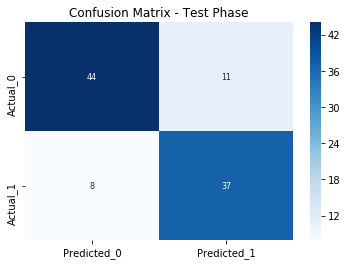

In [10]:
#Training and testing Moon's Data
########################################### BY: SHREYA NAGARKAR #####################################################
print("Moon's Data ")
outputMoon = network(2, 5, epoch,Train_Moon,label_train, moon_total_train_labelsize, learningrate=0.001)
TestModel = predict_Testdata(outputMoon,Test_Moon,label_test,moon_total_test_labelsize)
#print(TestModel)

# Observation on Moon's Dataset
### by: Shreya
1. Accuracy obtained is 79% on Training Data and 71% on Testing Data. We can say the algorithm performed fairly well but it did fail to predict some labels. 

2. From the confusion matrix it is observed that 29 input entries were wrongly predicted out of 100 input entries from the test data.


Mnist's Data 


c:\users\riti chakraborty\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Training Set Accuracy: 91.94944598337949
Testing Set Accuracy: 93.37539432176656


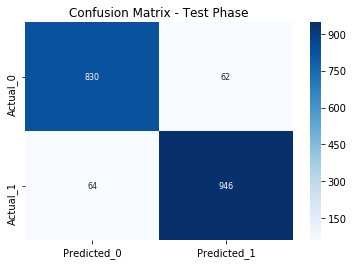

In [11]:
#Training and testing MNIST Data
print("Mnist's Data ")
outputdigits = network(784, 3, epoch, X__train, y__train, mnist_total_train_labelsize, learningrate=0.0001)
TestModel = predict_Testdata(outputdigits,X__test,y__test, mnist_total_test_labelsize)

# Observation on MNIST Dataset
We are classifying between 3 and 5
1. From the confusion matrix it is observed that, out of 1902 records 1776 records were correctly classified.
2. Therefore the accuracy is good for both Training Set as well as testing set.

# Enhancement 1

The function of the model above is optimized by Minibatch Gradient Descent Algorithm. In minibatch gradient descent algorithm, instead of sending the complete data, it is sent in batches and the model is built and tested. The batch size taken is 1150 and the total data is 11552. Hence, The minibatch gradient loop is worked for 10 times. Initially the data of 1150 rows is taken as a first minibatch and later on from 1151 to 2230 and so on. The test and train data is taken in this manner in minibatches and model is trained and tested for 40 epochs. The advantage of using minibatch gradient descent algorithm is , since the data is taken in batches, the convergence is calculated for each batch and also the computation time of the model decreases.

Reference : https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

In [12]:
# Setting the number of epochs
epoch = 40
# Defining the function prediction where the input parameter passed as features, labels, learning rate and the model trained. 
def predict_enhanced(model, x, y, ls):
    
# Pred and Test_error are the lists created
    pred=[]
    W1, b1, W2, b2 = model
    Test_error=[]
    
#Forward propagation

    z11 = np.dot(x,W1) + b1
    a1 = sigmoid(z11)
    z22 = sigmoid(np.dot(a1,W2) + b2)
    
# Calculating the errors by subtracting the predicted result from the actual one. *np.round & np.absolute* functions are used
# to get the absolute rounded value of the output.

    Test_error = y- np.round(np.absolute(z22))
    
# Correctly predicted results are checked below by checking the result of the Test error. If the result is correctly predicted
# the output of the test error would be 0 and hence later on the length of the correctTest pred is used to calculate the accuracy.
    correctTestpred = [n for n in Test_error if np.any(n) == 0 ]
    
# Accuracy of the trained model is calculated below.
# It is calculated by checking the number of correctly predicted results over the total number of results.
    accuracy=(len(correctTestpred)/ls)*100 
    return accuracy


def build_model_enhanced(inputnodes,hiddennodes,epoch, x, y, ls, learningrate):
    
    np.random.seed(9)    
    # Initializing weights and biases.
    W1 = np.random.randn(inputnodes, hiddennodes)
    W1 = W1/np.amax(W1)
    b1 = np.ones((1, hiddennodes))
    W2 = np.random.randn(hiddennodes, 1)
    W2 = W2/np.amax(W2)
    b2 = np.ones((1, 1))


    model = {}
    accuracy = []
    for i in range(epoch):

        # Forward propagation
        #Calculating the output from the first layer
        z11= sigmoid(np.dot(x, W1) + b1)
        # Calculating the output from the second layer
        z22= sigmoid(np.dot(z11, W2) + b2)#layer2
        #Error is calculated by decreasing the predicted value of the output from the actual one.
        Train_error = y - np.round(np.absolute(z22))
        # Calculating the accuracy.
        #If both, actual and predicted value matches, the difference would be 0 and this is used to calculate the accuracy.
        correctpred = [num for num in Train_error if np.any(num) == 0 ]
     
        # Backpropagation
        #Output to hidden
        delta2 = (z22 - y) * sigmoid(z22)
        # Updating weights and biases
        W2 = W2 - learningrate * (z11.T.dot(delta2))
        b2 = b2 - learningrate * np.sum(delta2)
        ############
        #hidden to Input layer
        delta1 = (delta2.dot(W2.T)) * sigmoid(z11)
        W1 = W1 - learningrate * (x.T.dot(delta1))
        b1 = b1 - learningrate * np.sum(delta1)
        ############
        # The updated weights and biases are returned which are used to predict. model{} consists of updated weights and biases.
        model = (W1,b1,W2,b2)
         
    return model
    

Observation:
The above model is trained and tested for the given Mnists' dataset. The accuracy in testing is observed to be (~82 %)

In [13]:
# Setting the number of iterations and size of a minibatch
Mtesting=[]

for minibatch_size in [500, 1000, 1500, 2000, 3000, 4000, 7000, 8000, 10000, 11552]:
    i = 0
    X__train_mini = X__train[i:i + minibatch_size]
    y__train_mini = y__train[i:i + minibatch_size]
    Mtr = build_model_enhanced(784,5,40,X__train_mini, y__train_mini,mnist_total_test_labelsize,learningrate=0.0001)            
    #i=minibatch_size
Mts=predict_enhanced(Mtr, X__test, y__test, mnist_total_test_labelsize)
Mtesting.append(Mts)    
            
#Printing the final accuracy for the testing data
print("Accuracy of the model after applying minibatch gradient descent is:  ", np.mean(Mtesting))

c:\users\riti chakraborty\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Accuracy of the model after applying minibatch gradient descent is:   81.80862250262881


# Enhancement 2
1. Regularization is basically used to prevent overfitting. 
2. Model overfitting happens when the neural network is trained excessively.
3. This causes neural network perform very well on training data but poorly on testing data. 
4. Regularization helps in reducing the variance of the weight so as to decrease the error.
5. In the algorithm below the regularization_coefm is added to the Weights generated in order to handle the spread of the values after assigning random weights before building the model.

In [14]:
   ### TRAINING NEURAL NETWORK
#Setting output node to 1
outputnodes = 1 
regularization_coeff = 0.01
#defining a function to program the network
def networkRiti(inputnodes, hiddennodes, epoch, x, y, ls, learningrate):
   
    #Initialising random seed
    np.random.seed(60)
    
    #Assigning Weights randomly to the nodes in layers
    W1 = np.random.randn(inputnodes, hiddennodes) 
    W1 = W1/np.amax(W1)
    b1 = np.ones((1, hiddennodes))
    W2 = np.random.randn(hiddennodes, 1)
    W2 = W2/np.amax(W2)
    b2 = np.ones((1, 1))


    #Creating a tuple to store the final weights and biases
    finalWeightsandbiases = {}
    
    #Implementing Gradient Descent: Passing the entire dataset in each iteration.
    for i in range(epoch):

        #Forward Propagation Algorithm
        #Layer1
        z11= sigmoid(np.dot(x, W1) + b1)
        
        #Layer2
        z22= sigmoid(np.dot(z11, W2) + b2)#layer2
    
        #Calculating error in prediction
        Train_error = y - np.round(np.absolute(z22))
          
        #Calculation total number of correct predictions
        correctpred = [num for num in Train_error if np.any(num) == 0 ]
       
        #Back Propagation
        #Output to hidden
        #Applying Regularization term - enhancement
        delta2 = (z22 - y) * sigmoid(z22)
        W2 = W2 + regularization_coeff * W2
        W2 = W2 - learningrate * (z11.T.dot(delta2))
        b2 = b2 - learningrate * np.sum(delta2)
        
        #hidden to Input layer
        delta1 = (delta2.dot(W2.T)) * sigmoid(z11)
        W1 = W1 + regularization_coeff * W1
        W1 = W1 - learningrate * (x.T.dot(delta1))
        b1 = b1 - learningrate * np.sum(delta1)
        ############
        
        #Updating the final weights and biases
        finalWeightsandbiases = (W1,b1,W2,b2)
        
        
    Train_Accuracy = (len(correctpred)/ls)*100

    print("Training Set Accuracy:", Train_Accuracy)    
    #plt.plot(accuracy)
    #plt.ylabel('Accuracy')
    #plt.show()
    return finalWeightsandbiases
    
   

Mnist's Data 


c:\users\riti chakraborty\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Training Set Accuracy: 92.41689750692521
Testing Set Accuracy: 93.84858044164038


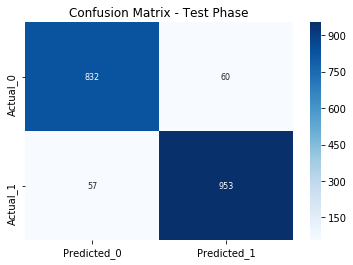

In [15]:
#Training and testing the data 
print("Mnist's Data ")
outputdigits = networkRiti(784, 3, epoch, X__train, y__train, mnist_total_train_labelsize, learningrate=0.0001)
TestModel = predict_Testdata(outputdigits,X__test,y__test, mnist_total_test_labelsize)

### Observation - on MNIST Dataset

After applying regularization to the weights:-
1. There is a slight increase in both testing and training accuracy.
2. The number of correctly predicted records from the test dataset is more.
3. This shows that the performance of the model has improved.

Links used for the above enhancement:
    
1: https://stats.stackexchange.com/questions/141555/how-does-regularization-reduce-overfitting

2: https://visualstudiomagazine.com/articles/2017/09/01/neural-network-l2.aspx